<a href="https://colab.research.google.com/github/seungmin-son/ML_Practice/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5%EB%A1%A0_12_13%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 - 와인 분류


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.plotting import scatterplotmatrix

In [2]:
red_wine = pd.read_csv('/content/winequality-red.csv', sep=';');
white_wine = pd.read_csv('/content/winequality-white.csv', sep=';');

In [3]:
red_wine['color'] =1
white_wine['color'] = 0

In [4]:
red_wine.shape, white_wine.shape

((1599, 13), (4898, 13))

In [7]:
wine = pd.concat([red_wine,white_wine])
wine.shape

(6497, 13)

## 데이터 전처리

In [8]:
y = wine['color']
X = wine.drop(['color'], axis= 1)
X.shape

(6497, 12)

In [9]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)

print('훈련용 데이터의 형태:', X_train.shape)
print('훈련용 데이터의 레이블 형태:', y_train.shape)
print('테스트용 데이터의 형태:', X_test.shape)
print('테스트용 데이터의 레이블 형태:', y_test.shape)

훈련용 데이터의 형태: (5197, 12)
훈련용 데이터의 레이블 형태: (5197,)
테스트용 데이터의 형태: (1300, 12)
테스트용 데이터의 레이블 형태: (1300,)


## 모델 생성


In [10]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(X_train.shape[1],)),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dense(len(np.unique(y)), activation='softmax'),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, epochs=30, batch_size=5, verbose=2)

eval_loss, eval_acc = model.evaluate(X_test, y_test)
print("\n테스트 데이터에 대한 손실: {:.3f}, 정확도: {:.3f}".format(eval_loss, eval_acc))

Epoch 1/30
1040/1040 - 5s - loss: 0.2586 - accuracy: 0.9251 - 5s/epoch - 5ms/step
Epoch 2/30
1040/1040 - 2s - loss: 0.1491 - accuracy: 0.9515 - 2s/epoch - 2ms/step
Epoch 3/30
1040/1040 - 5s - loss: 0.1257 - accuracy: 0.9567 - 5s/epoch - 4ms/step
Epoch 4/30
1040/1040 - 2s - loss: 0.1112 - accuracy: 0.9652 - 2s/epoch - 2ms/step
Epoch 5/30
1040/1040 - 2s - loss: 0.1063 - accuracy: 0.9675 - 2s/epoch - 2ms/step
Epoch 6/30
1040/1040 - 2s - loss: 0.1025 - accuracy: 0.9657 - 2s/epoch - 2ms/step
Epoch 7/30
1040/1040 - 2s - loss: 0.0921 - accuracy: 0.9727 - 2s/epoch - 2ms/step
Epoch 8/30
1040/1040 - 2s - loss: 0.0907 - accuracy: 0.9731 - 2s/epoch - 1ms/step
Epoch 9/30
1040/1040 - 2s - loss: 0.0797 - accuracy: 0.9802 - 2s/epoch - 2ms/step
Epoch 10/30
1040/1040 - 2s - loss: 0.0830 - accuracy: 0.9754 - 2s/epoch - 2ms/step
Epoch 11/30
1040/1040 - 2s - loss: 0.0845 - accuracy: 0.9748 - 2s/epoch - 2ms/step
Epoch 12/30
1040/1040 - 2s - loss: 0.0773 - accuracy: 0.9790 - 2s/epoch - 2ms/step
Epoch 13/30
1

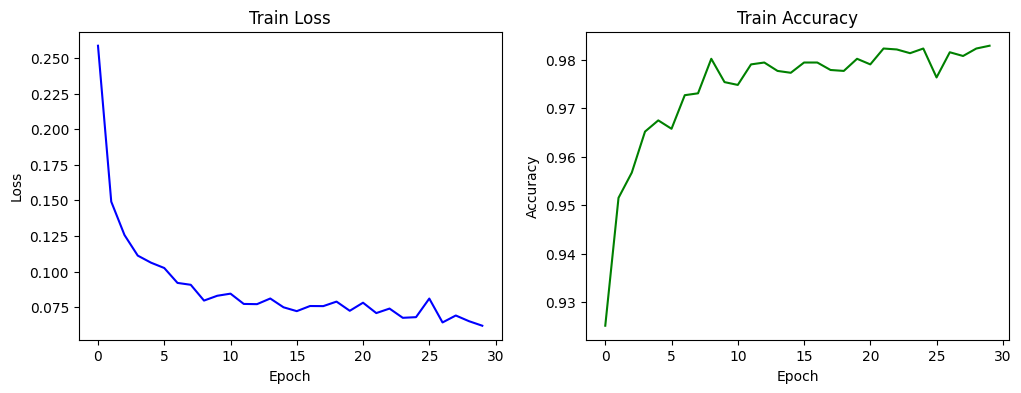

In [12]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.title("Train Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.title("Train Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

In [13]:
model.save('wine_model.h5')

loaded_model = keras.models.load_model('wine_model.h5')

loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 12)                0         
                                                                 
 dense (Dense)               (None, 60)                780       
                                                                 
 dense_1 (Dense)             (None, 2)                 122       
                                                                 
Total params: 902 (3.52 KB)
Trainable params: 902 (3.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


손실이 0.032로 매우 낮고, 정확도가 0.992로 매우 높게 나온다.

# 데이터 - 타이타닉 생존자 예측

In [84]:
df = pd.read_csv('./titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [85]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['sex'])

df['gender'] = le.transform(df['sex'])
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,gender
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


## 데이터 전처리

In [86]:
df['age'].fillna(df['age'].mean(), inplace=True)
df['fare'].fillna(df['fare'].mean(), inplace=True)

In [87]:
X = df[['pclass','age','sibsp','parch','fare','gender']].values
y = df['survived'].values

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X_scaled  = scaler.transform(X)

## 모델 구축

In [95]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0, test_size=0.20)

print('훈련용 데이터의 형태:', X_train.shape)
print('훈련용 데이터의 레이블 형태:', y_train.shape)
print('테스트용 데이터의 형태:', X_test.shape)
print('테스트용 데이터의 레이블 형태:', y_test.shape)


# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=(X_train.shape[1],)),
#     keras.layers.Dense(60, activation='relu'),
#     keras.layers.Dense(len(np.unique(y)), activation='softmax'),
# ])


from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(32, input_dim=6, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

훈련용 데이터의 형태: (1047, 6)
훈련용 데이터의 레이블 형태: (1047,)
테스트용 데이터의 형태: (262, 6)
테스트용 데이터의 레이블 형태: (262,)


In [96]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, batch_size=5, verbose=2)

Epoch 1/30
210/210 - 3s - loss: 0.5869 - accuracy: 0.7058 - 3s/epoch - 13ms/step
Epoch 2/30
210/210 - 1s - loss: 0.4612 - accuracy: 0.7975 - 581ms/epoch - 3ms/step
Epoch 3/30
210/210 - 0s - loss: 0.4458 - accuracy: 0.7994 - 448ms/epoch - 2ms/step
Epoch 4/30
210/210 - 0s - loss: 0.4384 - accuracy: 0.8061 - 362ms/epoch - 2ms/step
Epoch 5/30
210/210 - 0s - loss: 0.4325 - accuracy: 0.8052 - 343ms/epoch - 2ms/step
Epoch 6/30
210/210 - 0s - loss: 0.4267 - accuracy: 0.8023 - 357ms/epoch - 2ms/step
Epoch 7/30
210/210 - 0s - loss: 0.4272 - accuracy: 0.8061 - 352ms/epoch - 2ms/step
Epoch 8/30
210/210 - 0s - loss: 0.4230 - accuracy: 0.8118 - 360ms/epoch - 2ms/step
Epoch 9/30
210/210 - 0s - loss: 0.4215 - accuracy: 0.8138 - 358ms/epoch - 2ms/step
Epoch 10/30
210/210 - 0s - loss: 0.4216 - accuracy: 0.8099 - 360ms/epoch - 2ms/step
Epoch 11/30
210/210 - 0s - loss: 0.4188 - accuracy: 0.8138 - 343ms/epoch - 2ms/step
Epoch 12/30
210/210 - 0s - loss: 0.4173 - accuracy: 0.8071 - 355ms/epoch - 2ms/step
Epo

In [97]:
eval_loss, eval_acc = model.evaluate(X_test, y_test)
print("테스트 데이터에 대한 손실: {:.3f}, 정확도: {:.3f}".format(eval_loss, eval_acc))

9/9 [==============================] - 0s 3ms/step - loss: 0.4293 - accuracy: 0.8092
테스트 데이터에 대한 손실: 0.429, 정확도: 0.809


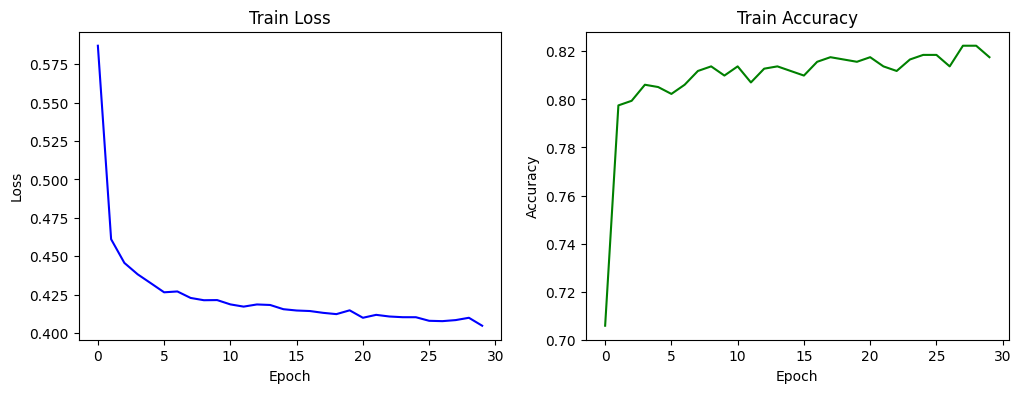

In [98]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.title("Train Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.title("Train Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

In [99]:
model.save('titanic_model.h5')

loaded_model = keras.models.load_model('titanic_model.h5')

loaded_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 32)                224       
                                                                 
 dense_28 (Dense)            (None, 16)                528       
                                                                 
 dense_29 (Dense)            (None, 1)                 17        
                                                                 
Total params: 769 (3.00 KB)
Trainable params: 769 (3.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 모델 구조
이진 분류를 위한 신경망 모델을 구성
 - 입력 차원이 6인 첫 번째 layer
 - 32개의 노드를 가진 두 번째 layer
 - 16개의 노드를 가진 세 번째 layer
 - 시그모이드 활성화 함수를 가진 마지막 layer


 - 모델 성능: 테스트 데이터에 대한 모델의 손실값은 약 0.429, 정확도는 약 0.809
  -> 준수한 성능